In [167]:
#graphs for the second BPF, which worked!
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy.interpolate import interp1d

In [251]:
#DEFINE FREQUENCIES WE'VE MEASURED
#SigGen>>>BPF>>>AMP>>>Scope(Vpp measurement in Volts on scope)
freqs1=np.array(list(range(100,127,5))+list(range(127,147))+list(range(150,196,5)))
bpf_amp_vpp=np.array([0.187, 0.234, 0.336, 0.546, 0.930, 1.61,
                     2.03, 2.25, 2.55, 2.74, 2.87, 2.94, 3.00, 3.01, 2.98, 2.95,
                     2.86, 2.74, 2.63, 2.43, 2.22, 2.05, 1.88, 1.70, 1.55, 1.39,
                     1.03, 0.805, 0.690, 0.670, 0.710, 0.700, 0.650, 0.555, 0.44, 0.375])

#SigGen>>>>AMP>>>scope (Vpp measurement in Volts on scope)
freqs2=np.array(list(range(100,136,5))+list(range(136,146))+list(range(150,181,5))) 
bpf_amp_minus_40dbm=np.array([0.009, 0.0094, 0.0086, 0.0098, 0.0113, 0.016,  0.022, 0.021,  0.0197, 0.019,
                         0.0185, 0.0174, 0.0167, 0.016,  0.0147, 0.014, 0.0138, 0.0128, 0.0107, 0.0105,
                         0.0108, 0.0101, 0.0091, 0.0095, 0.0098])
###it's easier to use mV
bpf_amp_minus_30dbm =np.array([10, 12, 11.4, 12.2, 16.8, 30.2, 50,  46.4, 44.6, 42.4, 
                               39.7, 37, 34.7, 32, 29.5, 27.1, 24.8, 23,  17.2, 15, 
                               14.5, 14, 14, 12.5, 12.5])/1000
bpf_amp_minus_20dbm = np.array([12.6, 14, 16,22.8, 38, 73.8, 151, 172, 167, 159,
                               149, 139, 127, 112, 100, 88, 77, 67, 47, 35,
                               32, 30.2, 28.6,27, 23.6])/1000
bpf_amp_minus_10dbm = np.array([20.4, 24,34, 49, 91, 202, 450, 513, 496, 472,
                               434, 405, 369, 330, 291, 257, 223, 197, 120, 89, 
                               77.5, 73.5, 69, 61, 53.5])/1000
bpf_amp_0dbm = np.array([50, 57, 81, 141, 279, 594, 1008, 1240, 1220, 1170,
                        1120, 1050, 945, 865, 785, 700, 625, 555, 340, 250,
                        210, 204, 204, 198, 178])/1000
#AMP ONLY MEASUREMENT PERFORMED AT -10dBm input, output in Volts
amp_only_minus_10dbm=np.array([2.3, 1.86, 1.70, 1.69, 1.89, 2.03, 2.12, 1.97, 1.93, 1.88,
                              1.82, 1.76, 1.70, 1.63, 1.56, 1.51, 1.46, 1.40, 1.24, 1.18,
                              1.18, 1.19, 1.32, 1.33, 1.29])
#Cable + connectors loss was measured in mV
cable_only_minus_10dbm=np.array([207, 222, 208, 185, 177, 177, 177, 159, 156, 150,
                                 148, 146, 142, 141, 141, 140, 138, 137, 142, 143,
                                 134, 127, 127, 125, 119])/1000

In [252]:
#COMPUTE Vpp from dBm
def dbm_to_Vpp(dbm):
    return (10**((dbm-10)/20)*2)

def dbm_to_Vrms(dbm):
    return (10**((dbm-10)/20))/sqrt(2)

def Vpp_to_db(vpp, relative_vpp):
    return (20*log(vpp/relative_vpp))
#Vpp Constants for various dBm -40,-30,-20,-10,0dbm
vpp_minus_40 = dbm_to_Vpp(-40)
vpp_minus_30 = dbm_to_Vpp(-30)
vpp_minus_20 = dbm_to_Vpp(-20)
vpp_minus_10 = dbm_to_Vpp(-10)
vpp_0        = dbm_to_Vpp(0)

In [254]:
#Interpolate curves
#Hereinafter, system_... refers to bpf_amp_minus
#system_40 is bp_amp_minus_40dbm
#system_40_int is an interpolated bp_amp_minus_40dbm
system_40_int = interp1d(x=freqs2, y=bpf_amp_minus_40dbm, kind='cubic')
system_30_int = interp1d(x=freqs2, y=bpf_amp_minus_30dbm, kind='cubic')
system_20_int = interp1d(x=freqs2, y=bpf_amp_minus_20dbm, kind='cubic')
system_10_int = interp1d(x=freqs2, y=bpf_amp_minus_10dbm, kind='cubic')
amp_only_int =  interp1d(x=freqs2, y=amp_only_minus_10dbm, kind='cubic')
cable_only_int = interp1d(x=freqs2, y=cable_only_minus_10dbm, kind='cubic')
cable_only_int_new_freqs= np.array(cable_only_int(freqs_new))
##this would work for integer start/stop frequencies, but it's fine for my usage
startfreq= freqs2[0]
endfreq = freqs2[-1] 
numitems_linear=endfreq-startfreq+1
freqs_new=np.linspace(100,180,numitems_linear) 
#USE AS FOLLOWS: new y coordinate = system_40_int(freqs_new)

###Get a graph in dB to assess difference in frequency perfromance for various input signal strength
#Take dbm_to_Vpp values for various input and compute the log formula
system_40_in_db = 20*np.log(np.array(system_40_int(freqs_new))/vpp_minus_40)
system_30_in_db = 20*np.log(np.array(system_30_int(freqs_new))/vpp_minus_30)
system_20_in_db = 20*np.log(np.array(system_20_int(freqs_new))/vpp_minus_20)
system_10_in_db = 20*np.log(np.array(system_10_int(freqs_new))/vpp_minus_10)
amp_in_db =       20*np.log(np.array(amp_only_int(freqs_new))/vpp_minus_10)
cable_in_db    =  20*np.log(cable_only_int_new_freqs/vpp_minus_10)

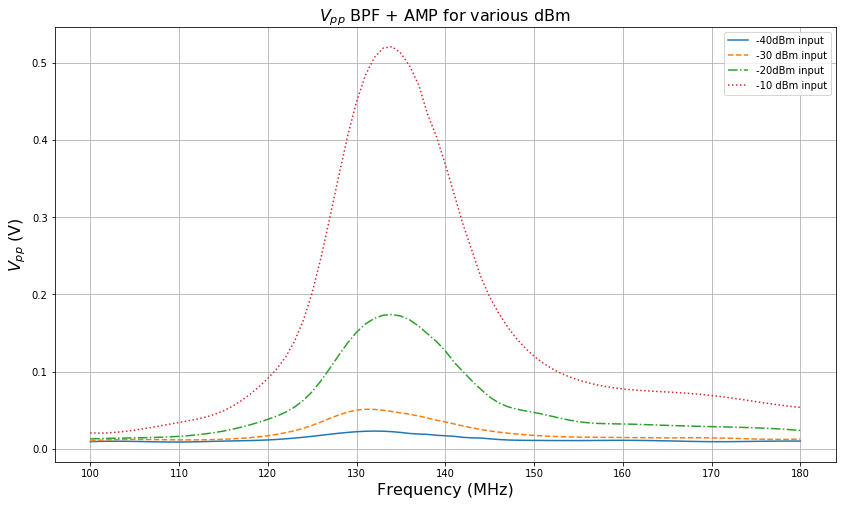

In [380]:
#points_to_mark=[32,37,42]
rcParams['figure.figsize'] = (14,8)
plt.plot(freqs_new, system_40_int(freqs_new), '-',
        freqs_new, system_30_int(freqs_new), '--',
        freqs_new, system_20_int(freqs_new), '-.',
        freqs_new, system_10_int(freqs_new), ':',
        markevery=points_to_mark)

#plt.title(r'\$V_pp for various dBm to BPF+AMP system.')
plt.title(r'$V_{pp}$ BPF + AMP for various dBm', fontsize=16)
plt.xlabel('Frequency (MHz)',  fontsize=16)
plt.ylabel('$V_{pp}$ (V)', fontsize=16)
plt.legend(['-40dBm input', '-30 dBm input','-20dBm input', '-10 dBm input'], loc='best')
plt.grid(True)
plt.show()


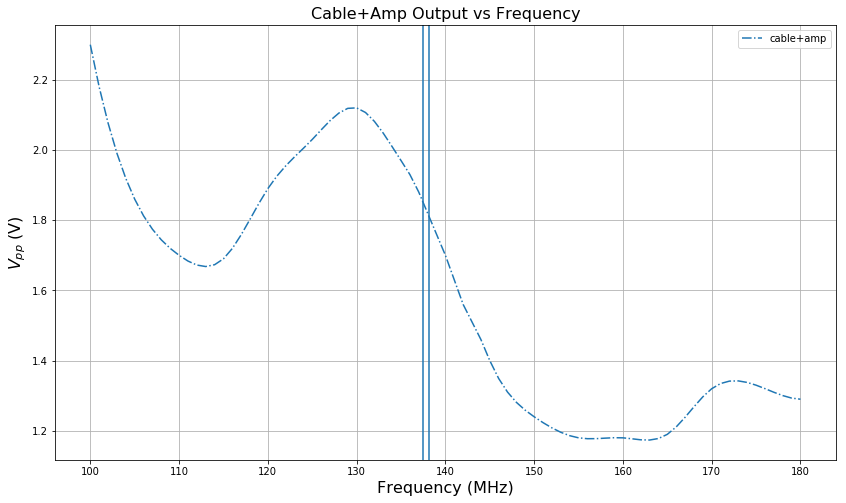

In [389]:
#PLOT Cable+AMP ONLY VPP
plt.plot(freqs_new, amp_only_int(freqs_new), '-.')
plt.title("Cable+Amp Output vs Frequency", fontsize=16)
plt.xlabel('Frequency (MHz)',  fontsize=16)
plt.ylabel("$V_{pp}$ (V)", fontsize=16)
plt.legend(['cable+amp'], loc='best')
plt.axvline(x=137.5)
plt.axvline(x=138.2)
plt.grid(True)
plt.show()

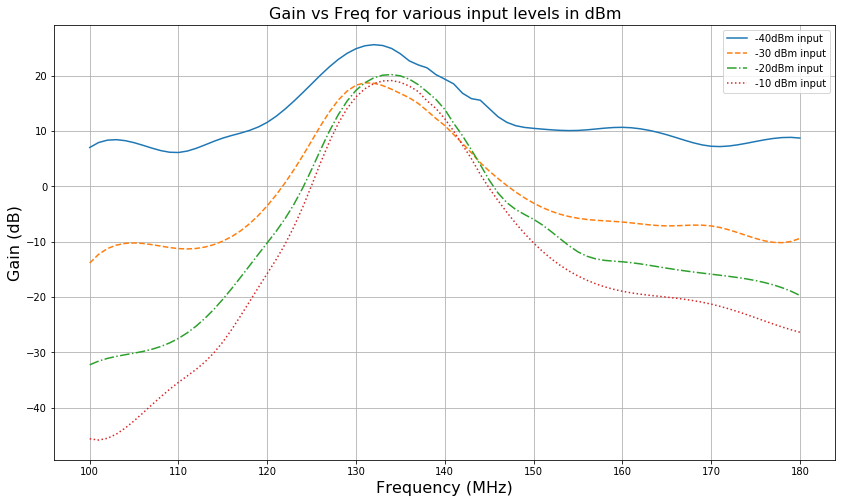

In [390]:
rcParams['figure.figsize'] = (14,8)
plt.plot(freqs_new, system_40_in_db, '-',
        freqs_new, system_30_in_db, '--',
        freqs_new, system_20_in_db, '-.',
        freqs_new, system_10_in_db, ':',)
#plt.title(r'\$V_pp for various dBm to BPF+AMP system.')
plt.title("Gain vs Freq for various input levels in dBm", fontsize=16)
plt.xlabel('Frequency (MHz)',  fontsize=16)
plt.ylabel('Gain (dB)', fontsize=16)
plt.legend(['-40dBm input', '-30 dBm input','-20dBm input', '-10 dBm input'], loc='best')
plt.grid(True)

plt.show()

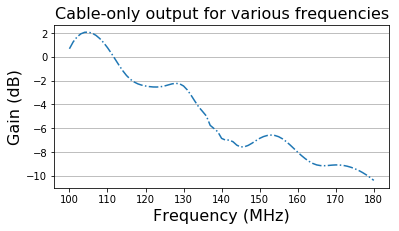

In [384]:
#PLOT cable loss in db

rcParams['figure.figsize'] = (6,3)
plt.plot(freqs_new, cable_in_db, '-.')
plt.title("Cable-only output for various frequencies", fontsize=16)
plt.xlabel('Frequency (MHz)',  fontsize=16)
plt.grid(True, axis='y')
plt.ylabel("Gain (dB)", fontsize=16)
plt.show()

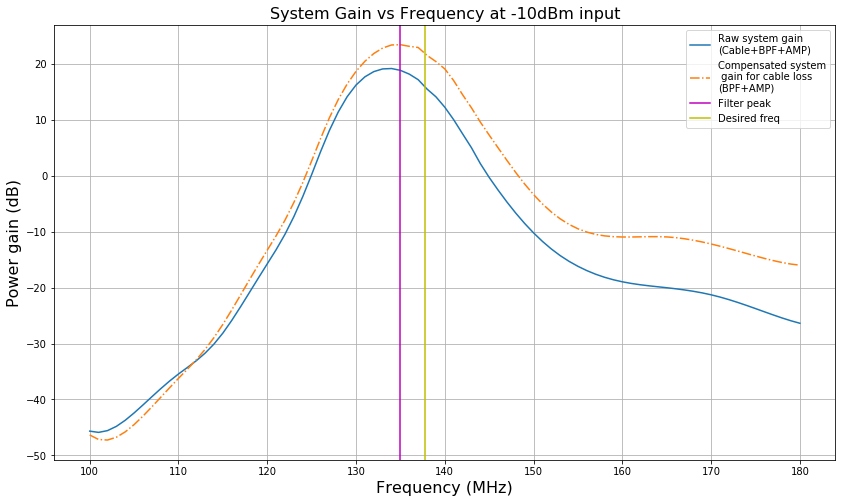

In [375]:
#Plot System gain without cable loss
compensated_system = system_10_in_db - cable_in_db
rcParams['figure.figsize']=(14,8)
plt.plot(freqs_new, system_10_in_db, '-')
plt.plot(freqs_new, compensated_system, '-.')

plt.title("System Gain vs Frequency at -10dBm input", fontsize=16)
plt.xlabel('Frequency (MHz)',  fontsize=16)
plt.grid(True)
plt.ylabel("Power gain (dB)", fontsize=16)
plt.axvline(x=135, linestyle='-',color="m")
plt.axvline(x=137.8, linestyle='-', color="y")
plt.legend(['Raw system gain\n(Cable+BPF+AMP)', 
            'Compensated system\n gain for cable loss\n(BPF+AMP)',
           'Filter peak',
           'Desired freq'], loc='best')
plt.show()